In [1]:
# importing pandas 
import pandas as pd 

# using pandas read_csv function to load the dataset 
df = pd.read_csv("RTA Dataset.csv") 
print(df.head())

       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [5]:
# Find the number of missing values present in each column
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


<Axes: xlabel='Accident_severity'>

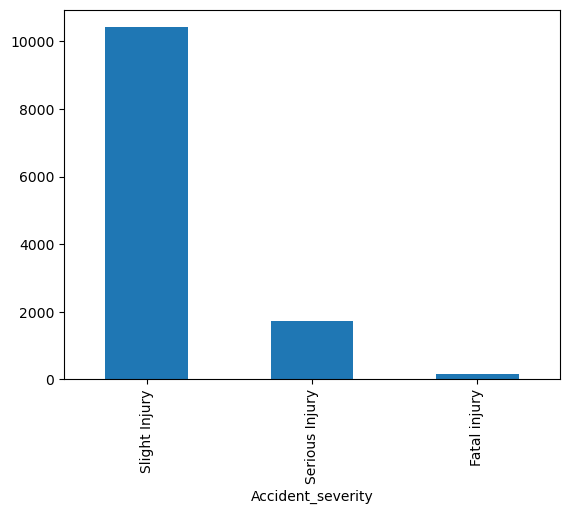

In [7]:
# target variable classes counts and bar plot
print(df['Accident_severity'].value_counts())
df['Accident_severity'].value_counts().plot(kind='bar')

<Axes: xlabel='Educational_level'>

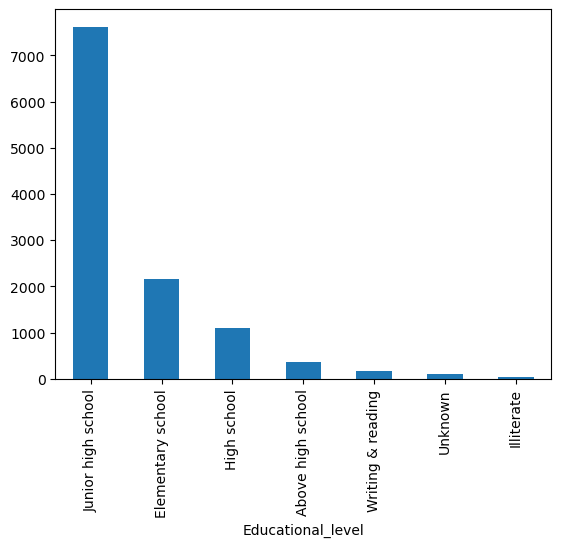

In [9]:
# Education levels of car drivers
df['Educational_level'].value_counts().plot(kind='bar')

C:\Users\sahil\anaconda3\Lib\site-packages\dabl\preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
C:\Users\sahil\anaconda3\Lib\site-packages\dabl\preprocessing.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series)
C:\Users\sahil\anaconda3\Lib\site-packages\dabl\preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
C:\Users\sahil\anaconda3\Lib\site-packages\dabl\preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, f

Target looks like classification
Showing only top 10 of 31 categorical features


C:\Users\sahil\anaconda3\Lib\site-packages\dabl\plot\utils.py:621: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = data.groupby(target)[column].value_counts().unstack(target)


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='Accident_severity'>,
 [array([[<Axes: xlabel='Number_of_casualties', ylabel='Number_of_casualties'>]],
        dtype=object)],
 array([[<Axes: title={'center': 'Number_of_vehicles_involved'}>,
         <Axes: title={'center': 'Types_of_Junction'}>,
         <Axes: title={'center': 'Age_band_of_driver'}>,
         <Axes: title={'center': 'Weather_conditions'}>,
         <Axes: title={'center': 'Type_of_vehicle'}>],
        [<Axes: title={'center': 'Area_accident_occured'}>,
         <Axes: title={'center': 'Cause_of_accident'}>,
         <Axes: title={'center': 'Day_of_week'}>,
         <Axes: title={'center': 'Light_conditions'}>,
         <Axes: title={'center': 'Type_of_collision'}>]], dtype=object)]

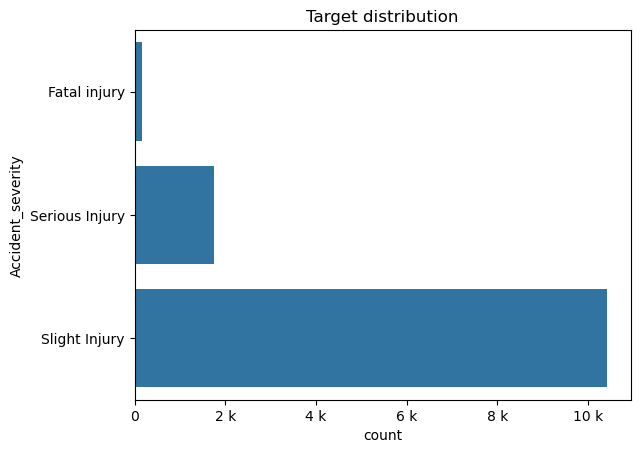

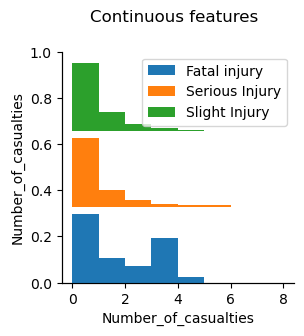

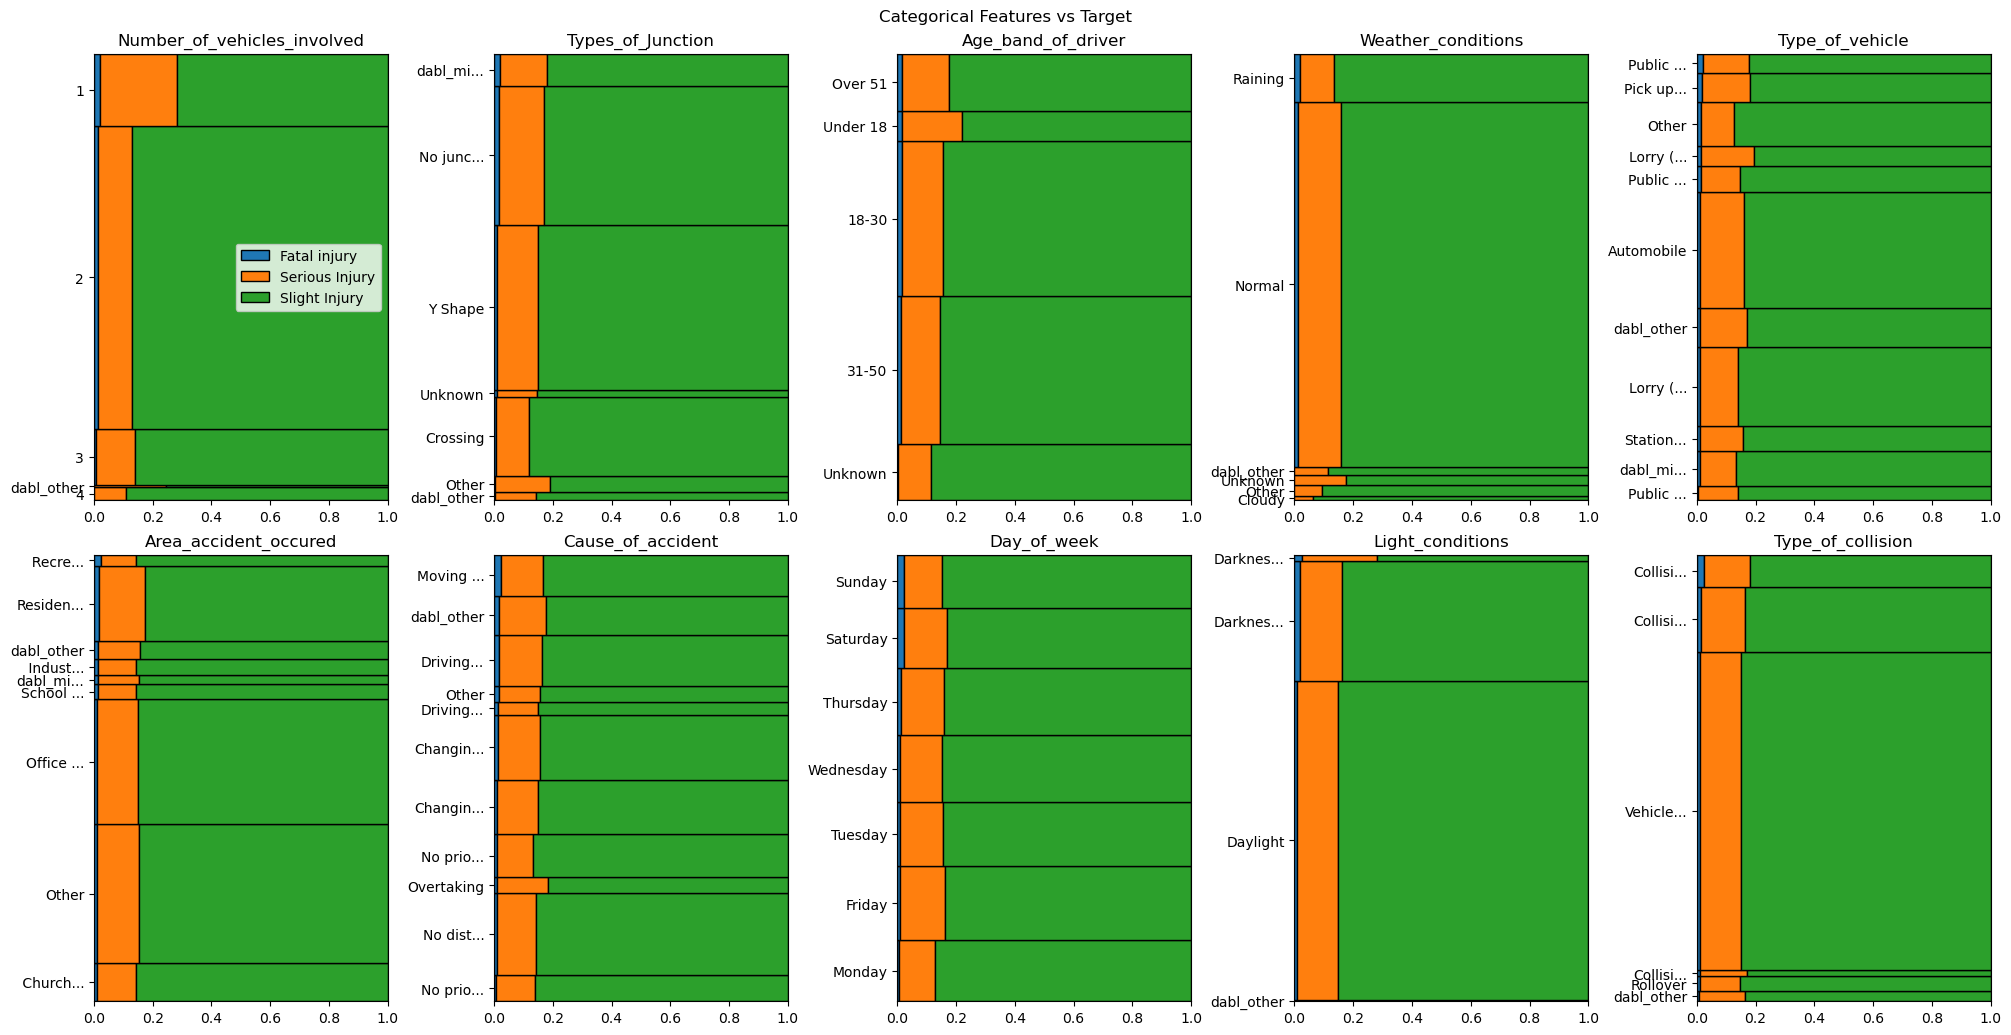

In [11]:
# Visualizing dataset using dabl library
!pip install dabl
import dabl
dabl.plot(df, target_col='Accident_severity')

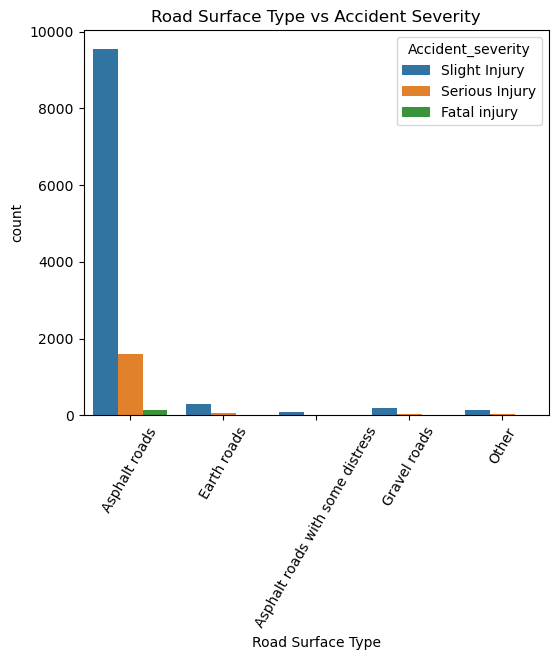

In [12]:
# plot the bar plot of road_surface_type and accident severity feature
import matplotlib.pyplot as plt
import streamlit as st
!pip install matplotlib seaborn
import seaborn as sns
plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=df)
plt.xlabel('Road Surface Type')
plt.xticks(rotation=60)
plt.title('Road Surface Type vs Accident Severity')
plt.show()

In [28]:
# convert object type column into datetime datatype column
df['Time'] = pd.to_datetime(df['Time'])

# Extrating 'Hour_of_Day' feature from the Time column
new_df = df.copy()
new_df['Hour_of_Day'] = new_df['Time'].dt.hour
n_df = new_df.drop('Time', axis=1)
n_df.head()


,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1


In [31]:
# NaN are missing because service info might not be available, we will fill as 'Unknowns'
feature_df['Service_year_of_vehicle'] = feature_df['Service_year_of_vehicle'].fillna('Unknown')
feature_df['Types_of_Junction'] = feature_df['Types_of_Junction'].fillna('Unknown')
feature_df['Area_accident_occured'] = feature_df['Area_accident_occured'].fillna('Unknown')
feature_df['Driving_experience'] = feature_df['Driving_experience'].fillna('unknown')
feature_df['Type_of_vehicle'] = feature_df['Type_of_vehicle'].fillna('Other')
feature_df['Vehicle_driver_relation'] = feature_df['Vehicle_driver_relation'].fillna('Unknown')
feature_df['Educational_level'] = feature_df['Educational_level'].fillna('Unknown')
feature_df['Type_of_collision'] = feature_df['Type_of_collision'].fillna('Unknown')
# features information
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            12316 non-null  object
 4   Vehicle_driver_relation      12316 non-null  object
 5   Driving_experience           12316 non-null  object
 6   Type_of_vehicle              12316 non-null  object
 7   Owner_of_vehicle             11834 non-null  object
 8   Service_year_of_vehicle      12316 non-null  object
 9   Defect_of_vehicle            7889 non-null   object
 10  Area_accident_occured        12316 non-null  object
 11  Lanes_or_Medians             11931 non-null  object
 12  Road_allignment              12174 non-null  object
 13  Types_of_Junction            12

In [35]:
# Categorical features to encode using one hot encoding 
features = ['Day_of_week','Number_of_vehicles_involved','Number_of_casualties','Area_accident_occured',
           'Types_of_Junction','Age_band_of_driver','Sex_of_driver','Educational_level',
           'Vehicle_driver_relation','Type_of_vehicle','Driving_experience','Service_year_of_vehicle','Type_of_collision',
           'Sex_of_casualty','Age_band_of_casualty','Cause_of_accident','Hour_of_Day']

# setting input features X and target y 
X = feature_df[features]  # here features are selected from 'object' datatype
y = n_df['Accident_severity']

# we will use pandas get_dummies method for on-hot encoding
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.shape

(12316, 106)

In [37]:
# import labelencoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# create labelencoder object
lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)
print("Encoded labels:",lb.classes_)
y_en = pd.Series(y_encoded)


Encoded labels: ['Fatal injury' 'Serious Injury' 'Slight Injury']


In [39]:
# feature seleciton method using chi2 for categorical output, categorical input
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(encoded_df, y_en)

# Take the selected features
cols = fs.get_feature_names_out()

# convert selected features into dataframe
fs_df = pd.DataFrame(X_new, columns=cols)

In [41]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTENC

# Example DataFrame creation (replace this with your actual DataFrame)
# fs_df = pd.DataFrame(...)  # Your DataFrame
# y_en = ...  # Your target variable

# Assuming categorical features are in columns 3 to 49 (0-indexed)
n_cat_index = list(range(3, 50))  # Convert to a list

# Creating SMOTENC object without the deprecated n_jobs parameter
smote = SMOTENC(categorical_features=n_cat_index, random_state=42)

# Fit and resample the dataset
X_n, y_n = smote.fit_resample(fs_df, y_en)

# Print the shape of the new upsampled dataset
print(X_n.shape, y_n.shape)

# Print the target classes distribution
print(pd.Series(y_n).value_counts())

(31245, 50) (31245,)
2    10415
1    10415
0    10415
Name: count, dtype: int64


In [43]:
# import the necessary library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# train and test split and building baseline model to predict target features
X_trn, X_tst, y_trn, y_tst = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
rf.fit(X_trn, y_trn)

# predicting on test data
predics = rf.predict(X_tst)

# train score 
rf.score(X_trn, y_trn)

0.9476716274603937

In [44]:
# classification report on test dataset
classif_re = classification_report(y_tst,predics)
print(classif_re)


# f1_score of the model
f1score = f1_score(y_tst,predics, average='weighted')
print(f1score)


              precision    recall  f1-score   support

           0       0.77      0.62      0.68      2085
           1       0.63      0.64      0.64      2100
           2       0.84      1.00      0.91      2064

    accuracy                           0.75      6249
   macro avg       0.75      0.75      0.74      6249
weighted avg       0.75      0.75      0.74      6249

0.743148649311389


In [129]:
import joblib
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Selecting 7 categorical features from the DataFrame
new_fea_df = feature_df[['Type_of_collision', 'Age_band_of_driver', 'Sex_of_driver',
                          'Educational_level', 'Service_year_of_vehicle', 'Day_of_week', 
                          'Area_accident_occured']]

# Initialize the OrdinalEncoder
oencoder2 = OrdinalEncoder()

# Fit and transform the selected features
encoded_df3 = pd.DataFrame(oencoder2.fit_transform(new_fea_df))

# Set the columns of the encoded DataFrame to match the original
encoded_df3.columns = new_fea_df.columns

# Save the ordinal encoder object for the inference pipeline
joblib.dump(oencoder2, "ordinal_encoder2.joblib")  # Corrected line

['ordinal_encoder2.joblib']

In [131]:
# final dataframe to be trained for model inference
s_final_df = pd.concat([feature_df[['Number_of_vehicles_involved','Number_of_casualties','Hour_of_Day']],encoded_df3], axis=1)

# train and test split and building baseline model to predict target features
X_trn2, X_tst2, y_trn2, y_tst2 = train_test_split(s_final_df, y_en, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=700, max_depth=20, random_state=42)
rf.fit(X_trn2, y_trn2)

# save the model object
joblib.dump(rf, "rta_model_deploy3.joblib", compress=9)

['rta_model_deploy3.joblib']

In [137]:
!pip install shap

   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   -- ------------------------------------ 30.7/456.2 kB 660.6 kB/s eta 0:00:01
   ----- --------------------------------- 61.4/456.2 kB 656.4 kB/s eta 0:00:01
   ------------- -------------------------- 153.6/456.2 kB 1.1 MB/s eta 0:00:01
   ---------------------- ----------------- 256.0/456.2 kB 1.4 MB/s eta 0:00:01
   ----------------------------------- ---- 409.6/456.2 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 1.9 MB/s eta 0:00:00


In [139]:
# import all the app dependencies
import pandas as pd
import numpy as np
import sklearn
import streamlit as st
import joblib
import shap

import matplotlib
from IPython import get_ipython
from PIL import Image

# load the encoder and model object
model = joblib.load("rta_model_deploy3.joblib")
encoder = joblib.load("ordinal_encoder2.joblib")

st.set_option('deprecation.showPyplotGlobalUse', False)

# 1: serious injury, 2: Slight injury, 0: Fatal Injury

st.set_page_config(page_title="Accident Severity Prediction App",
                page_icon="🚧", layout="wide")

#creating option list for dropdown menu
options_day = ['Sunday', "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
options_age = ['18-30', '31-50', 'Over 51', 'Unknown', 'Under 18']

# number of vehical involved: range of 1 to 7
# number of casualties: range of 1 to 8
# hour of the day: range of 0 to 23

options_types_collision = ['Vehicle with vehicle collision','Collision with roadside objects',
                           'Collision with pedestrians','Rollover','Collision with animals',
                           'Unknown','Collision with roadside-parked vehicles','Fall from vehicles',
                           'Other','With Train']

options_sex = ['Male','Female','Unknown']

options_education_level = ['Junior high school','Elementary school','High school',
                           'Unknown','Above high school','Writing & reading','Illiterate']

options_services_year = ['Unknown','2-5yrs','Above 10yr','5-10yrs','1-2yr','Below 1yr']

options_acc_area = ['Other', 'Office areas', 'Residential areas', ' Church areas',
       ' Industrial areas', 'School areas', '  Recreational areas',
       ' Outside rural areas', ' Hospital areas', '  Market areas',
       'Rural village areas', 'Unknown', 'Rural village areasOffice areas',
       'Recreational areas']

# features list
features = ['Number_of_vehicles_involved','Number_of_casualties','Hour_of_Day','Type_of_collision','Age_band_of_driver','Sex_of_driver',
       'Educational_level','Service_year_of_vehicle','Day_of_week','Area_accident_occured']

2024-11-08 03:52:52.615 
════════════════════════════════════════════════
deprecation.showPyplotGlobalUse IS NO LONGER SUPPORTED.

The support for global pyplot instances is planned to be removed soon.

Please update <user defined>.
════════════════════════════════════════════════



In [47]:
import streamlit as st
import numpy as np
import shap
from PIL import Image

def main():
    with st.form("road_traffic_severity_form"):
        st.subheader("Please enter the following inputs:")

        # Input fields for the user
        No_vehicles = st.slider("Number of vehicles involved:", 1, 7, value=0, format="%d")
        No_casualties = st.slider("Number of casualties:", 1, 8, value=0, format="%d")
        Hour = st.slider("Hour of the day:", 0, 23, value=0, format="%d")
        collision = st.selectbox("Type of collision:", options=options_types_collision)
        Age_band = st.selectbox("Driver age group?:", options=options_age)
        Sex = st.selectbox("Sex of the driver:", options=options_sex)
        Education = st.selectbox("Education of driver:", options=options_education_level)
        service_vehicle = st.selectbox("Service year of vehicle:", options=options_services_year)
        Day_week = st.selectbox("Day of the week:", options=options_day)
        Accident_area = st.selectbox("Area of accident:", options=options_acc_area)

        submit = st.form_submit_button("Predict")

    # encode using ordinal encoder and predict
    if submit:
        # Prepare the input array
        input_array = np.array([collision, Age_band, Sex, Education, service_vehicle, Day_week, Accident_area], ndmin=2)
        encoded_arr = list(encoder.transform(input_array).ravel())

        num_arr = [No_vehicles, No_casualties, Hour]
        pred_arr = np.array(num_arr + encoded_arr).reshape(1, -1)

        # Predict the target from all the input features
        prediction = model.predict(pred_arr)

        if prediction == 0:
            st.write(f"The severity prediction is Fatal Injury⚠")
        elif prediction == 1:
            st.write(f"The severity prediction is Serious Injury")
        else:
            st.write(f"The severity prediction is Slight Injury")

        # Explainable AI using SHAP library
        st.subheader("Explainable AI (XAI) to understand predictions")
        shap.initjs()
        shap_values = shap.TreeExplainer(model).shap_values(pred_arr)
        st.write(f"For prediction {prediction}")
        shap.force_plot(shap.TreeExplainer(model).expected_value[0], shap_values[0],
                        pred_arr, feature_names=features, matplotlib=True, show=False).savefig("pred_force_plot.jpg", bbox_inches='tight')

        img = Image.open("pred_force_plot.jpg")

        # Render the SHAP plot on front-end to explain predictions
        st.image(img, caption='Model explanation using SHAP')

        st.write("Developed By: Avi Kumar Talaviya")
        st.markdown("""Reach out to me on: [Twitter](https://twitter.com/avikumart_) |
                    [Linkedin](https://www.linkedin.com/in/avi-kumar-talaviya-739153147/) |
                    [Kaggle](https://www.kaggle.com/avikumart) 
                    """)



In [154]:
a,b,c = st.columns([0.2,0.6,0.2])
with b:
  st.image("vllkyt19n98psusds8.jpg", use_column_width=True)


# description about the project and code files            
st.subheader("🧾Description:")
st.text("""This data set is collected from Addis Ababa Sub-city police departments for master's research work. 
The data set was prepared from manual documents of road traffic accidents of the year 2017-20. 
All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident.
Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms.
""")

st.markdown("Source of the dataset: [Click Here](https://www.narcis.nl/dataset/RecordID/oai%3Aeasy.dans.knaw.nl%3Aeasy-dataset%3A191591)")

st.subheader("🧭 Problem Statement:")
st.text("""The target feature is Accident_severity which is a multi-class variable. 
The task is to classify this variable based on the other 31 features step-by-step by going through each day's task. 
The metric for evaluation will be f1-score
""")

st.markdown("Please find GitHub repository link of project: [Click Here](https://github.com/avikumart/Road-Traffic-Severity-Classification-Project)")                  
# run the main function               
if __name__ == '__main__':
   main()

RuntimeError: Runtime hasn't been created!